In [23]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
xtrain=xtrain/255.0
xtest=xtest/255.0

In [11]:
class_labels=['aeroplane','automobile','bird','cat','deer','dog','frog ','horse','ship','truck']
model=keras.Sequential([ layers.Flatten(input_shape=(32,32,3)),
layers.Dense(1024,activation='relu'),
layers.Dense(512,activation='relu'),
layers.Dense(256,activation='relu'),
layers.Dense(10,activation='softmax') ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))
test_loss,test_accuracy=model.evaluate(xtest,ytest)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 60ms/step - accuracy: 0.2738 - loss: 2.0150 - val_accuracy: 0.3755 - val_loss: 1.7141
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.3844 - loss: 1.7032 - val_accuracy: 0.4085 - val_loss: 1.6464
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4265 - loss: 1.5995 - val_accuracy: 0.4281 - val_loss: 1.6070
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.4479 - loss: 1.5303 - val_accuracy: 0.4607 - val_loss: 1.5224
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 56ms/step - accuracy: 0.4660 - loss: 1.4877 - val_accuracy: 0.4604 - val_loss: 1.5115
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - accuracy: 0.4751 - loss: 1.4615 - val_accuracy: 0.4805 - val_loss: 1.4642
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4850 - loss: 1.4302 - val_accuracy: 0.4714 - val_loss: 1.4819
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 52ms/step - accuracy: 0.4

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


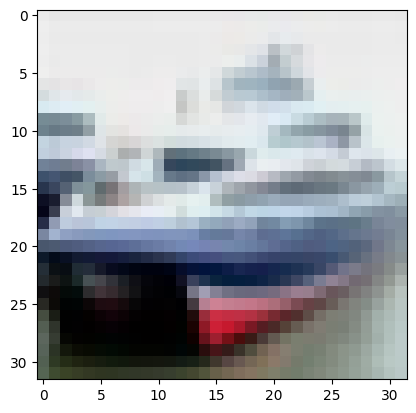

In [38]:
predictions=model.predict(xtest)
plt.imshow(xtest[1])
plt.show()

In [39]:
actual_label= class_labels[int(ytest[1])]
predicted_label=class_labels[np.argmax(predictions[1])]
print('actual label= ',actual_label)
print('predicted label= ',predicted_label)

actual label=  ship
predicted label=  ship


/tmp/ipython-input-39-3419277705.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_label= class_labels[int(ytest[1])]
